# Spark Funds - EDA Assignment 
## Name : <font color='Green'>Sameer Gadicherla</font>      Batch : <font color='Green'> 31st March 2021 </font>

## 1. Data Cleaning

### Loading the datasets

In [1]:
## import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")
# import plotly.express as px

In [2]:
# load the datasets into two different dataframes
companies = pd.read_csv("Data/companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("Data/rounds2.csv", encoding = "ISO-8859-1")

In [3]:
# print the heads to see how the data looks
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
### look at the comapnies which are operational
companies.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [5]:
companies.shape

(66368, 10)

In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


In [7]:
# getting number of unique companies in companies df
companies.describe()
# There are 66368 unique permalinks as seen below

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Bustos-Media,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [8]:
# getting number of unique companies in rounds2 df
rounds2.company_permalink.describe()
# There are 90247 unique permalinks out of 114949 as seen below

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [9]:
# lowercase the permalinks so that its standardised accross the two dataframes
companies.permalink = companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [10]:
# checking the number of companies which are present in rounds but not in companies df
not_present = rounds2[~rounds2.company_permalink.isin(companies.permalink)]

In [11]:
not_present
# we see that there are seven such companies
#looks like the permalinks have special characters

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.000
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [12]:
## lets rename the company_permalink field in rounds2 df to permalink so that we can merge both the dataframes on this column

rounds2 = rounds2.rename(columns = {"company_permalink": "permalink"})

In [13]:
## lets check the shape of rounds2 before we add extra companies from companies df
rounds2.shape

(114949, 6)

In [14]:
rounds2

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.000
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.000
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.000


In [15]:
master_frame = companies.merge(rounds2,how="inner",on="permalink")

In [16]:
##checking if multiple rounds are happening on the same company
master_frame.permalink.value_counts().to_frame().head()

,permalink
/organization/solarflare,19
/organization/semprius,18
/organization/exagen-diagnostics,18
/organization/quellan,18
/organization/endogastric-solutions,17


In [17]:
org_shape = master_frame.shape
org_shape

(114942, 15)

In [18]:
100 * (master_frame.isnull().sum()/master_frame.shape[0])

permalink                  0.000
name                       0.001
homepage_url               5.335
category_list              2.964
status                     0.000
country_code               7.544
state_code                 9.517
region                     8.839
city                       8.837
founded_at                17.852
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.909
funded_at                  0.000
raised_amount_usd         17.386
dtype: float64

- The reason why we chose permalink as unique is it has 0 missing values in master frame
- We cannot use <font color = "blue">name</font> as unique key ,because it has missing values

In [19]:
## Let us drop the columns which we dont plan working with 
master_frame = master_frame.drop(columns =["funding_round_code","funding_round_permalink","funded_at","founded_at","city","region","state_code","homepage_url","name"])
master_frame.head()

,permalink,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,operating,IND,venture,10000000.000
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,venture,nan
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.000
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,operating,NaN,venture,3406878.000
4,/organization/0-6-com,Curated Web,operating,CHN,venture,2000000.000


In [20]:
## lets print the missing values count again
master_frame.isnull().sum()/master_frame.shape[0]

permalink            0.000
category_list        0.030
status               0.000
country_code         0.075
funding_round_type   0.000
raised_amount_usd    0.174
dtype: float64

In [21]:
## no of funding rounds happened on closed companies
closed_rounds = master_frame[master_frame.status == "closed"]
closed_rounds.shape[0]

8720

In [22]:
##drop all the funding rounds for the companies which are not closed
master_frame = master_frame[master_frame.status != "closed"]

**We are assuming that we cannot invest in companies which are closed, where there were 8720 rounds**

In [23]:
100 * (master_frame.isnull().sum()/master_frame.shape[0])

permalink             0.000
category_list         2.243
status                0.000
country_code          6.429
funding_round_type    0.000
raised_amount_usd    17.246
dtype: float64

In [24]:
## funded amount column has around 17.246% missing values.
master_frame[master_frame.raised_amount_usd.isnull()].shape

(18319, 6)

#### We see that there are around ~18.3K values missing for the funded amount. Let's drop them
- The reason why we are dropping them instead of imputing values is:
    - It depends on lot of other factors apart from just imputing the mean or median.
    - For example: we need to check which sector they belong to and impute the mean or median there if possible.
    - It might also depend on the FT in a particular country as well.

In [25]:
## dropping the missing funding amount rows
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [26]:
100*(master_frame.isnull().sum()/master_frame.shape[0])

permalink            0.000
category_list        0.720
status               0.000
country_code         5.263
funding_round_type   0.000
raised_amount_usd    0.000
dtype: float64

In [27]:
### Around 5.263% of records do not have country code. Country code is important for us as we are looking for investing in countries
print(master_frame[master_frame.country_code.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.country_code.isnull()]

(4626, 6)


In [28]:
## since we are focussing on which sector to invest in as well, these below missing records need to be dropped
print(master_frame[master_frame.category_list.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.category_list.isnull()]

(431, 6)


### We want to focus only on the main four types of Funding:
### Venture - Seed - Angel - Private Equity

In [29]:
### Lets Drop all the Other Rows which dont fall in the above funding types
master_frame = master_frame[master_frame.funding_round_type.isin(["venture","seed","private_equity","angel"])]

In [30]:
## printing the master_frame shape again
refined_shape = master_frame.shape
refined_shape

(70162, 6)

In [31]:
### Total records dropped
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])

Total Records Dropped:  44780
Percentage of Records Dropped:  38.95877921038437


In [32]:
## lets make sure we have dropped all the missing data
master_frame.isnull().sum()/master_frame.shape[0]

permalink            0.000
category_list        0.000
status               0.000
country_code         0.000
funding_round_type   0.000
raised_amount_usd    0.000
dtype: float64

In [33]:
### Lets get the most representative values of each funding type
median_values = master_frame.groupby("funding_round_type")["raised_amount_usd"].median().to_frame()
median_values

,raised_amount_usd
funding_round_type,
angel,418856.000
private_equity,21000000.000
seed,313837.000
venture,5000000.000


In [34]:
y = list(median_values["raised_amount_usd"])
x = list(median_values.index)
print(x,y)

['angel', 'private_equity', 'seed', 'venture'] [418856.0, 21000000.0, 313837.0, 5000000.0]


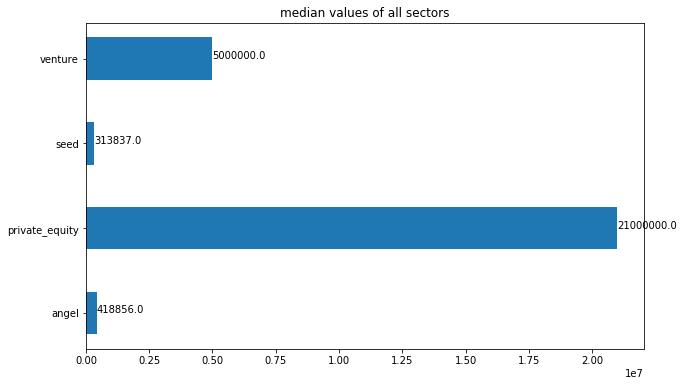

In [35]:
plt.figure(figsize=(10,6))
plt.barh(x, y,0.5)

plt.title('median values of all sectors')
for index, value in enumerate(y):
    plt.text(value, index, str(value))

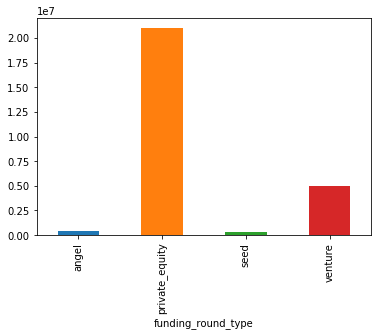

In [36]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median().plot.bar()

In [37]:
master_frame.groupby("funding_round_type")["funding_round_type"].count()

funding_round_type
angel              3960
private_equity     1723
seed              19731
venture           44748
Name: funding_round_type, dtype: int64

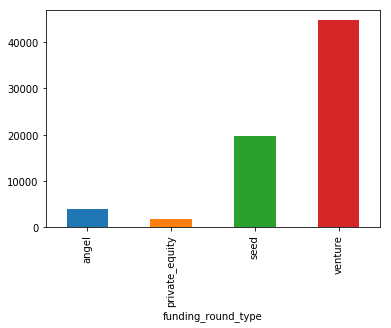

In [38]:
master_frame.groupby("funding_round_type")["funding_round_type"].count().plot.bar()

## Observations:
 - we see above that most of the investments are happening in the venture level funding 
 - It falls in the range of budget provided by spark funds as well
 - It's median value is 5M
 - It's the one which has the highest count as well

In [39]:
## Let's remove records which aren't of venture type funding
master_frame = master_frame[master_frame.funding_round_type == "venture"]

In [40]:
master_frame.shape

(44748, 6)

## Country Analysis
### Investing in Countries where most other countries have invested

In [41]:
master_frame.groupby("country_code")["country_code"].count().to_frame().sort_values("country_code",ascending=False)

,country_code
country_code,
USA,33620
GBR,1895
CHN,1509
CAN,1145
FRA,860
IND,792
ISR,740
DEU,524
ESP,289


- Clearly in terms of investments count, USA dominates any other country!

In [42]:
temp_df = pd.DataFrame({})
temp_df["Funding"] = master_frame.groupby("country_code")["raised_amount_usd"].sum()
temp_df = temp_df.sort_values("Funding",ascending= False)

#printing the top 9 countries based on the highest funding in all rounds - SUM
top9 = temp_df.iloc[0:9]
print(top9)


                      Funding
country_code                 
USA          398324586390.000
CHN           38642273502.000
GBR           18142285645.000
IND           13920253718.000
CAN            8747167598.000
FRA            6742608637.000
ISR            6484356814.000
DEU            6021103078.000
JPN            3156202471.000


Text(0.5,1,'Top 9 Countries based on Funding')

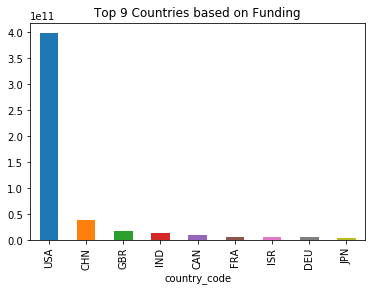

In [43]:
### lets see how they look when plotted on based of sum of the funding
top9.Funding.plot.bar()
plt.title("Top 9 Countries based on Funding")

## Observations
<ol><li> USA , GBR , IND are the top three English Speaking countries after checking the wiki page </li> <li> CHN isn't an English Speaking Country according to the wiki page </li></ol>

## Sector Analysis - 1

In [44]:
# lets load the mapping csv into a df
mapping = pd.read_csv("../EDA_SparkFunds/Data/mapping.csv")

In [45]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [46]:
## Column check: Blank is a column is which can be dropped(optional) and is used only for the first row which is empty
mapping.Blanks.sum()

1

In [47]:
x = mapping[mapping.category_list == str("Accounting")].iloc[0]
x[x == 1].axes[0][0]

'Social, Finance, Analytics, Advertising'

In [48]:
### write a function which takes the category name as the parameter and gives the main sector as the answer
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        ## We see that there are few primary sectors/categories which do not fall into any of the main sectors, lets 
        ## keep them them into Others
        return None
get_main_sector("3D")

'Manufacturing'

In [49]:
## create a derived column for primary sector by using the name before '|'
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x: str(x).split("|")[0])

In [50]:
## main_sector column using primary sector
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [51]:
### records with no main_sector mapping
no_main_sector = master_frame[master_frame.main_sector.isnull()]
no_main_sector

,permalink,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
10,/organization/0xdata,Analytics,operating,USA,venture,20000000.000,Analytics,None
11,/organization/0xdata,Analytics,operating,USA,venture,1700000.000,Analytics,None
12,/organization/0xdata,Analytics,operating,USA,venture,8900000.000,Analytics,None
61,/organization/100plus,Analytics,acquired,USA,venture,500000.000,Analytics,None
148,/organization/19pay,Finance|FinTech,operating,CHN,venture,6230000.000,Finance,None
198,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,2500000.000,Analytics,None
199,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,500000.000,Analytics,None
200,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,venture,1000000.000,Analytics,None
713,/organization/51credit-com,Finance,operating,CHN,venture,10000000.000,Finance,None
819,/organization/6sicuro-it,Finance,operating,ITA,venture,3134880.000,Finance,None


In [52]:
## the following primary sectors do not have a mapping (3117 entries)
no_main_sector.groupby("primary_sector")["primary_sector"].count().to_frame().sort_values("primary_sector",ascending=False)

,primary_sector
primary_sector,
Analytics,1459
Finance,691
Nanotechnology,146
Financial Services,121
Big Data Analytics,111
Career Management,68
Cloud Management,47
Event Management,30
Finance Technology,27


In [53]:
## Lets map these missing mappings to the right sectors 
## I will map all the praimry sectors with >= 100 values missing and drop the others

## finetune existing mapping function to map these missing mappings
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        if category == "Analytics" or category == "Finance" or category == "Financial Services" or category == "Big Data Analytics":
            return "Social, Finance, Analytics, Advertising"
        elif category == "Nanotechnology":
            return "Cleantech / Semiconductors"
        else:
            return None    

In [54]:
## replace these missing mappings
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [55]:
#drop all the primary sectors with less than 100 records
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [56]:
## reprint the data cleaned
refined_shape = master_frame.shape
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])


Total Records Dropped:  70653
Percentage of Records Dropped:  61.46839275460667


In [57]:
## investments based on main_sector
master_frame.groupby("main_sector")["main_sector"].count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9406
Entertainment                               2467
Health                                      3735
Manufacturing                               3075
News, Search and Messaging                  5427
Others                                     10591
Social, Finance, Analytics, Advertising     8898
Name: main_sector, dtype: int64

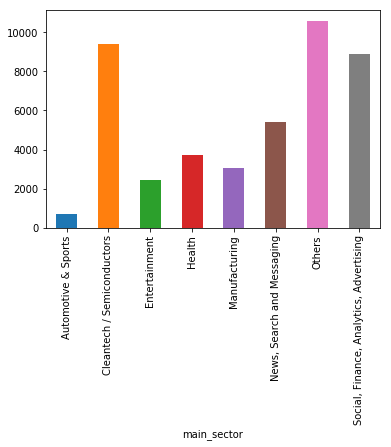

In [58]:
master_frame.groupby("main_sector")["main_sector"].count().plot.bar()

## Observations:
 <ol><li>As of now we see that Others is highly contributed sectors</li><li>CleanTech/Semiconductors is the second highest</li></ol>

## Sector Analysis - 2

In [59]:
## lets reduce the master_frame to only USA GBR IND and raised fund is in between 5M and 15M
master_frame = master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

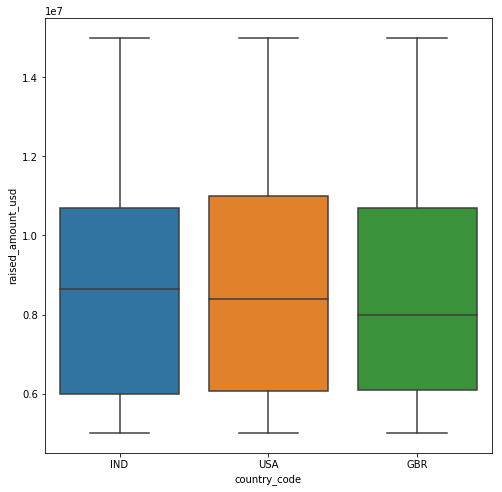

In [60]:
## lets have a look at the outliers
plt.figure(figsize=(8,8))
sns.boxplot(data = master_frame , x="country_code", y="raised_amount_usd")

In [61]:
## Creating DataFrames per country falling within 5M and 15M brackets
usa = master_frame[(master_frame.country_code == "USA")]
gbr = master_frame[(master_frame.country_code == "GBR")]
ind = master_frame[(master_frame.country_code == "IND")]

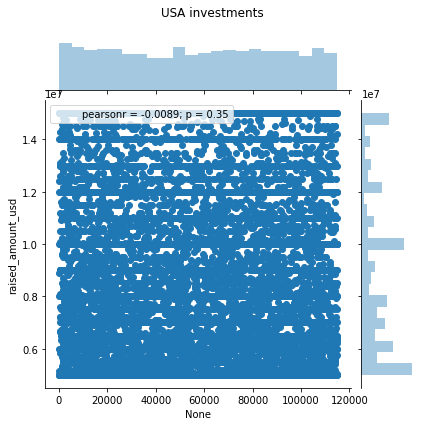

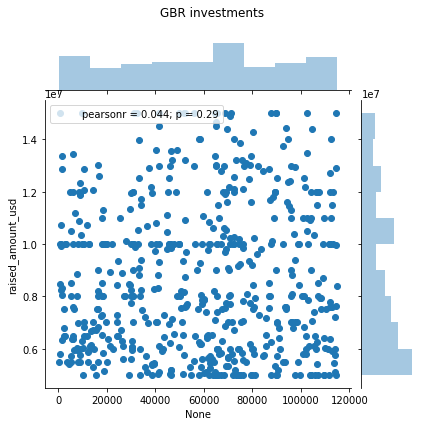

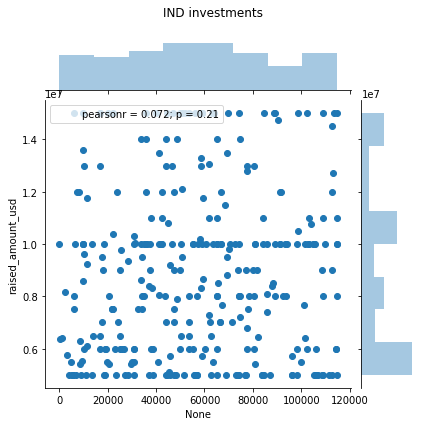

In [62]:
p = sns.jointplot(usa.index,usa.raised_amount_usd)
p.fig.suptitle("USA investments")
p.fig.subplots_adjust(top=0.9)

q = sns.jointplot(gbr.index,gbr.raised_amount_usd)
q.fig.suptitle("GBR investments")
q.fig.subplots_adjust(top=0.9)

r = sns.jointplot(ind.index,ind.raised_amount_usd)
r.fig.suptitle("IND investments")
r.fig.subplots_adjust(top=0.9)
plt.show()

1. We can see that in all the three countries the data points are uniformly scattered across the 5M to 15M range
2. There are chances of proceeding with this data itself, as there is very less scope for outliers

In [63]:
print("USA")
print(usa.raised_amount_usd.describe())
print("----------------------------------------------------------------")
print("GBR")
print(gbr.raised_amount_usd.describe())
print("----------------------------------------------------------------")
print("IND")
print(ind.raised_amount_usd.describe())

USA
count      11171.000
mean     8950291.884
std      3081078.273
min      5000000.000
25%      6060364.000
50%      8400000.000
75%     11000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64
----------------------------------------------------------------
GBR
count        573.000
mean     8677381.260
std      2858143.331
min      5000000.000
25%      6100000.000
50%      8000000.000
75%     10700000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64
----------------------------------------------------------------
IND
count        314.000
mean     8963928.669
std      3226794.010
min      5000000.000
25%      6000000.000
50%      8635000.000
75%     10685000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64


### If we look at the box plots above , we can say that:
1. GBR and IND have similar 25th and 75th perncentiles
2. std is significantly more in all the three countries and approximately close to 3M
3. All the three countries have median lying nearby to mean
4. IND has a higher representative median value when compared to USA and GBR

In [64]:
## lets check all the investments done in betwenn 10M and 15M
master_frame_higher = master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 10000000) & (master_frame.raised_amount_usd <= 15000000)]

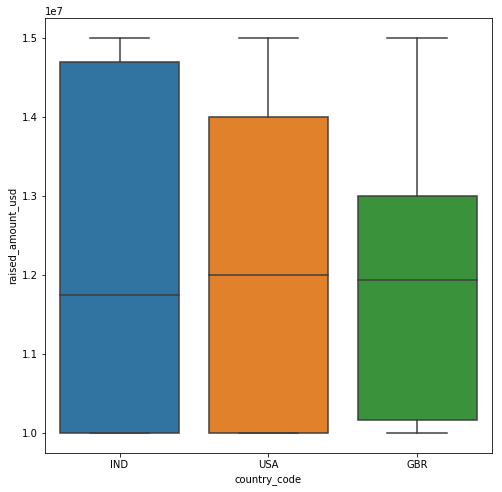

In [65]:
## box plots of 3 countries for investments between 5M and 15M
plt.figure(figsize=(8,8))
sns.boxplot(data = master_frame_higher , x="country_code", y="raised_amount_usd")

In [66]:
usa_10m_plus =usa[usa.raised_amount_usd >= 10000000]
gbr_10m_plus = gbr[gbr.raised_amount_usd >= 10000000]
ind_10m_plus = ind[ind.raised_amount_usd >= 10000000]

In [67]:
usa_10m_plus.raised_amount_usd.describe()

count       4571.000
mean    12110617.753
std      1859469.073
min     10000000.000
25%     10000000.000
50%     12000000.000
75%     14000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [68]:
gbr_10m_plus.raised_amount_usd.describe()

count        212.000
mean    11874707.184
std      1631763.307
min     10000000.000
25%     10169775.500
50%     11930882.000
75%     13000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [69]:
ind_10m_plus.raised_amount_usd.describe()

count        134.000
mean    12088134.328
std      2084704.832
min     10000000.000
25%     10000000.000
50%     11750000.000
75%     14687500.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

### Observations:
1. We see that there are no significant outliers in the range of 10M to 15M in all the countries
2. India's IQR in 10M-15M range is closer to 15M

In [70]:
### total no of investments in each of these countries
print(usa.shape[0], " investments in USA")
print(gbr.shape[0], "   investments in UK/GBR")
print(ind.shape[0], "   investments in India")

11171  investments in USA
573    investments in UK/GBR
314    investments in India


In [71]:
### total dollars investmented in each of these countries
print(usa.raised_amount_usd.sum(), "dollars invested total in USA")
print(gbr.raised_amount_usd.sum(), "  dollars invested total in UK/GBR")
print(ind.raised_amount_usd.sum(), "  dollars invested total in India")

99983710640.0 dollars invested total in USA
4972139462.0   dollars invested total in UK/GBR
2814673602.0   dollars invested total in India


In [72]:
#sector wise amount raised in USA
usa.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,24414471874.000
"Social, Finance, Analytics, Advertising",22331401642.000
Cleantech / Semiconductors,20111701192.000
"News, Search and Messaging",12814157191.000
Health,7733830000.000
Manufacturing,6700079468.000
Entertainment,4503764912.000
Automotive & Sports,1374304361.000


In [73]:
#sector wise count of investments in USA
usa_count = usa.groupby("main_sector")["raised_amount_usd"].count().to_frame()
usa_count = usa_count.rename(columns={"raised_amount_usd":"no of investments"})
usa_count = usa_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
usa_count_top3 = usa_count.iloc[0:3,:]
usa_count_top3

,no of investments
main_sector,
Others,2732
"Social, Finance, Analytics, Advertising",2535
Cleantech / Semiconductors,2190


In [74]:
#sector wise amount raised in UK
gbr.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,1189442240.000
Cleantech / Semiconductors,1035059650.000
"Social, Finance, Analytics, Advertising",1033982443.000
"News, Search and Messaging",558500705.000
Entertainment,442241059.000
Manufacturing,343324290.000
Health,202537510.000
Automotive & Sports,167051565.000


In [75]:
#sector wise count of investments in UK
gbr_count = gbr.groupby("main_sector")["raised_amount_usd"].count().to_frame()
gbr_count = gbr_count.rename(columns={"raised_amount_usd":"no of investments"})
gbr_count = gbr_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
gbr_count_top3 = gbr_count.iloc[0:3,:]
gbr_count_top3

,no of investments
main_sector,
Others,137
"Social, Finance, Analytics, Advertising",125
Cleantech / Semiconductors,115


In [76]:
#sector wise amount raised in India
ind.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,934289507.000
"Social, Finance, Analytics, Advertising",535549550.000
"News, Search and Messaging",408834545.000
Entertainment,272080000.000
Manufacturing,200900000.000
Cleantech / Semiconductors,165380000.000
Health,160740000.000
Automotive & Sports,136900000.000


In [77]:
#sector wise count of investments in India
ind_count = ind.groupby("main_sector")["raised_amount_usd"].count().to_frame()
ind_count = ind_count.rename(columns={"raised_amount_usd":"no of investments"})
ind_count = ind_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
ind_count_top3 = ind_count.iloc[0:3,:]
ind_count_top3

,no of investments
main_sector,
Others,102
"Social, Finance, Analytics, Advertising",59
"News, Search and Messaging",49


In [78]:
## Country-Sector wise sum of investments
pt = pd.pivot_table(data = pd.concat([usa,gbr,ind],axis=0),index=["country_code","main_sector"],aggfunc=np.sum)
pt

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                          167051565.000
             Cleantech / Semiconductors                  1035059650.000
             Entertainment                                442241059.000
             Health                                       202537510.000
             Manufacturing                                343324290.000
             News, Search and Messaging                   558500705.000
             Others                                      1189442240.000
             Social, Finance, Analytics, Advertising     1033982443.000
IND          Automotive & Sports                          136900000.000
             Cleantech / Semiconductors                   165380000.000
             Entertainment                                272080000.000
             Health                                       160740000.000
             Manufacturing                                200900000.000
             News, Search and Messaging                   408834545.000
             Others                                       934289507.000
             Social, Finance, Analytics, Advertising      535549550.000
USA          Automotive & Sports                         1374304361.000
             Cleantech / Semiconductors                 20111701192.000
             Entertainment                               4503764912.000
             Health                                      7733830000.000
             Manufacturing                               6700079468.000
             News, Search and Messaging                 12814157191.000
             Others                                     24414471874.000
             Social, Finance, Analytics, Advertising    22331401642.000

In [79]:
#other way of seeing sum
total_sum = pt.groupby("country_code")["raised_amount_usd"].sum()
total_sum = total_sum.to_frame()
total_sum

,raised_amount_usd
country_code,
GBR,4972139462.000
IND,2814673602.000
USA,99983710640.000


In [80]:
pt3 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code","main_sector"],values=["raised_amount_usd"],aggfunc=len)

In [81]:
### clear view of all sectors per country with the respective counts
pt3

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                                 16.000
             Cleantech / Semiconductors                         115.000
             Entertainment                                       51.000
             Health                                              23.000
             Manufacturing                                       40.000
             News, Search and Messaging                          66.000
             Others                                             137.000
             Social, Finance, Analytics, Advertising            125.000
IND          Automotive & Sports                                 13.000
             Cleantech / Semiconductors                          20.000
             Entertainment                                       32.000
             Health                                              18.000
             Manufacturing                                       21.000
             News, Search and Messaging                          49.000
             Others                                             102.000
             Social, Finance, Analytics, Advertising             59.000
USA          Automotive & Sports                                157.000
             Cleantech / Semiconductors                        2190.000
             Entertainment                                      520.000
             Health                                             853.000
             Manufacturing                                      739.000
             News, Search and Messaging                        1445.000
             Others                                            2732.000
             Social, Finance, Analytics, Advertising           2535.000

In [82]:
##create a pivot table with the counts of each category under a country
pt4 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code"],columns="main_sector",values="raised_amount_usd",aggfunc=len)

In [83]:
pt4

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,16.000,115.000,51.000,23.000,40.000,66.000,137.000,125.000
IND,13.000,20.000,32.000,18.000,21.000,49.000,102.000,59.000
USA,157.000,2190.000,520.000,853.000,739.000,1445.000,2732.000,2535.000


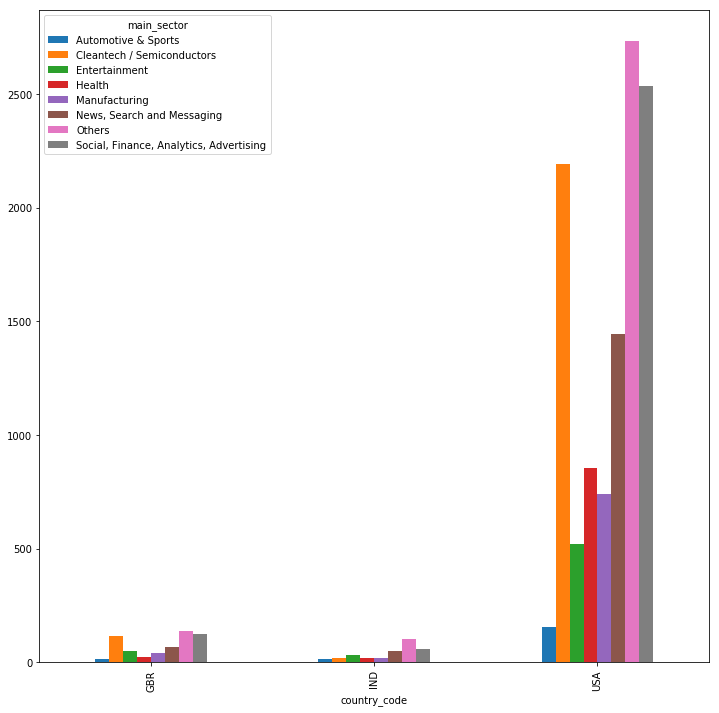

In [84]:
#barplot to see top sectors per country based on count
pt4.plot(kind = "bar" , stacked=False,figsize=(12,12))

                                   raised_amount_usd
permalink                                           
/organization/virtustream               64300000.000
/organization/capella                   54968051.000
/organization/airtight-networks         54201907.000
/organization/decarta                   52100000.000
/organization/black-duck-software       51000000.000


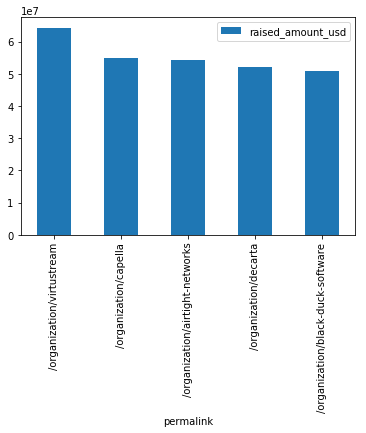

In [85]:
##Top 5 companies in Others Sector in USA
usa_top5_others = usa[usa.main_sector == "Others"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(usa_top5_others)
usa_top5_others.plot.bar()

                                       raised_amount_usd
permalink                                               
/organization/electric-cloud                37000000.000
/organization/sensage                       36250000.000
/organization/silverrail-technologies       29000000.000
/organization/opencloud                     27972766.000
/organization/myoptique-group               27694613.000


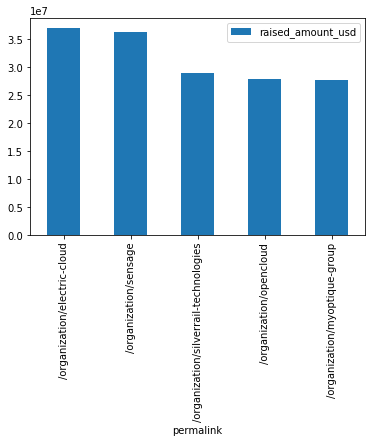

In [86]:
##Top 5 companies in Others Sector in GBR 
gbr_top5_others = gbr[gbr.main_sector == "Others"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(gbr_top5_others)
gbr_top5_others.plot.bar()

                                raised_amount_usd
permalink                                        
/organization/firstcry-com           39000000.000
/organization/myntra                 38000000.000
/organization/commonfloor            32900000.000
/organization/pepperfry-com          28000000.000
/organization/itzcash-card-ltd       25000000.000


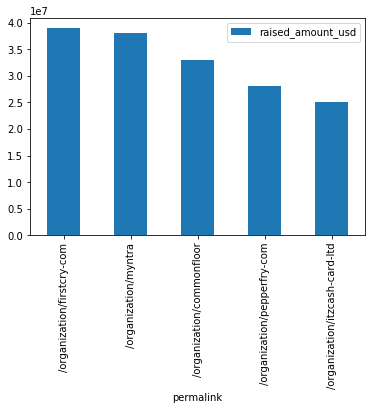

In [87]:
##Top 5 companies in Others Sector in IND 
ind_top5_others = ind[ind.main_sector == "Others"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(ind_top5_others)
ind_top5_others.plot.bar()

                           raised_amount_usd
permalink                                   
/organization/shotspotter       67933006.000
/organization/demandbase        63000000.000
/organization/intacct           61800000.000
/organization/netbase           60600000.000
/organization/lotame            59700000.000


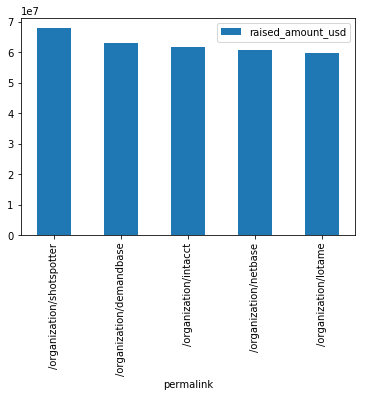

In [88]:
##Top 5 companies in Social, Finance, Analytics, Advertising(2nd Top) Sector in USA
usa_top5_sfaa = usa[usa.main_sector == "Social, Finance, Analytics, Advertising"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(usa_top5_sfaa)
usa_top5_sfaa.plot.bar()

                                     raised_amount_usd
permalink                                             
/organization/celltick-technologies       37500000.000
/organization/mythings                    34000000.000
/organization/zopa                        32900000.000
/organization/imagini                     28550000.000
/organization/marketinvoice               25553007.000


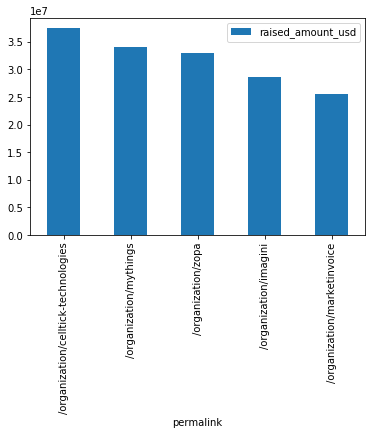

In [89]:
##Top 5 companies in Cleantech / Semiconductors(2nd Top) Sector in GBR 
gbr_top5_ctsc = gbr[gbr.main_sector == "Social, Finance, Analytics, Advertising"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(gbr_top5_ctsc)
gbr_top5_ctsc.plot.bar()

                                          raised_amount_usd
permalink                                                  
/organization/manthan-systems                  50700000.000
/organization/komli-media                      28000000.000
/organization/shopclues-com                    25000000.000
/organization/intarvo                          21900000.000
/organization/grameen-financial-services       21556050.000


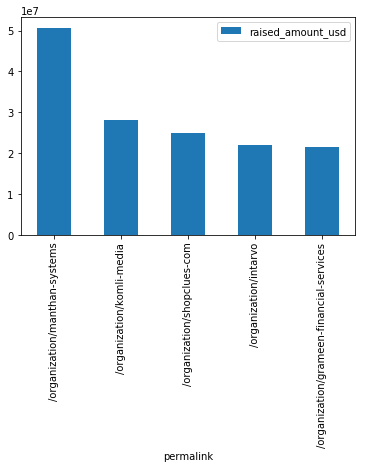

In [90]:
##Top 5 companies in Social, Finance, Analytics, Advertising(2nd Top) Sector in IND
ind_top5_sfaa = ind[ind.main_sector == "Social, Finance, Analytics, Advertising"].groupby("permalink").sum().sort_values("raised_amount_usd",ascending=False).iloc[0:5]
print(ind_top5_sfaa)
ind_top5_sfaa.plot.bar()

## Conclusions
### Based on the Counts - 
1. <font color='Green'>Others, Social-Finance-Analytics-Advertising and CleanTech/SemiConductors</font> are Top sectors in <font color='Blue'>USA</font>
2. <font color='Green'>Others, Social-Finance-Analytics-Advertising and CleanTech/SemiConductors</font> are Top sectors in <font color='Blue'>GBR(UK)</font>
3. <font color='Green'>Others, Social-Finance-Analytics-Advertising and News-Search-Messaging</font> are Top sectors in <font color='Blue'>India</font>

### Implications -
4. There are more than one companies recieving the top fund in USA , GBR and IND under the top sector and the second top sector
5. Since SparkFunds wants to invest in a funding type where most companies do, we have selected <font color = "Green">venture</font> as the best one.
6. Since SparkFunds wants to invest in a top english speaking country , we can invest in <font color = "Green">USA</font> as it has the highest number of investments done among the top three countries including GBR and IND.
7. Since SparkFunds wants to invest in a sector which has the highest number of investments, <font color = "Green"> Others </font> is the one which is highly contributed sector. 
8. But this sector has a little uncertainity because this sector is not focused on Prime Area of Knowledge. Instead if we can invest in the second highest sector in **USA** i.e., **Social-Finance-Analytics-Advertising** , it is kind of a better investment as the domain here is fixed and **2535** investements are done here which are close to **2732** investments done in **Others**.
   - ShotsPotter is the highest fund receiving company in USA under Social-Finance-Analytics-Advertising with the total sum of 67.93M dollars
   - VirtuStream is the highest fund receiving company in USA under Others Category with the total sum of 64.3M dollars.
   - Outlier removal wasn't necessary due to given reasons before where the budget cap itself helped us eliminate most of them.